# 🏡 House Price Predictor

This notebook builds a **linear regression model** using `SGDRegressor` to predict house prices from the `Housing.csv` dataset.

### Steps:

1. **Load Data**

   - Read housing dataset into a pandas DataFrame.

2. **Preprocess Data**

   - Map categorical features (`yes`/`no`) to numeric values (0/1).
   - Convert furnishing status into numeric codes (`furnished=1`, `semi-furnished=0`, `unfurnished=-1`).
   - Separate `Price` as the target variable and the remaining columns as features.

3. **Feature Scaling**

   - Standardize input features with `StandardScaler` to improve SGD optimization.

4. **Model Training**

   - Train a **Stochastic Gradient Descent Regressor (SGDRegressor)** on normalized features.

5. **Predictions & Visualization**

   - Predict house prices on the training data.
   - Plot **Actual vs Predicted Price** for each feature.

6. **Model Evaluation**
   - Evaluate performance using regression metrics:
     - **MAE (Mean Absolute Error)**
     - **MSE (Mean Squared Error)**
     - **RMSE (Root Mean Squared Error)**
     - **R² Score (Coefficient of Determination)**


In [281]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math


In [282]:
houses = pd.read_csv("../data/Housing.csv")

In [283]:
mapping ={"yes" : 1, "no": 0  }
mapping_furnishing_status = { "furnished" : 1 , "semi-furnished": 0, "unfurnished" : -1}
features = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]
 
houses[features] = houses[features].apply(lambda col: col.map(mapping))
houses['furnishingstatus'] = houses['furnishingstatus'].map(mapping_furnishing_status)
 
 

In [284]:
X_train = houses.iloc[ :, 1:]
y_targets = houses.iloc[ :, 0]
print(X_train.shape,y_targets.shape)

(545, 12) (545,)


In [285]:
scaler = StandardScaler(  copy=True,with_mean=True,with_std=True)

In [286]:
x_norm = scaler.fit_transform(X_train)
 

In [287]:
model = SGDRegressor(max_iter=10000)
model.fit(x_norm,y_targets)
y_predicts = model.predict(x_norm) 
X_features = X_train.columns

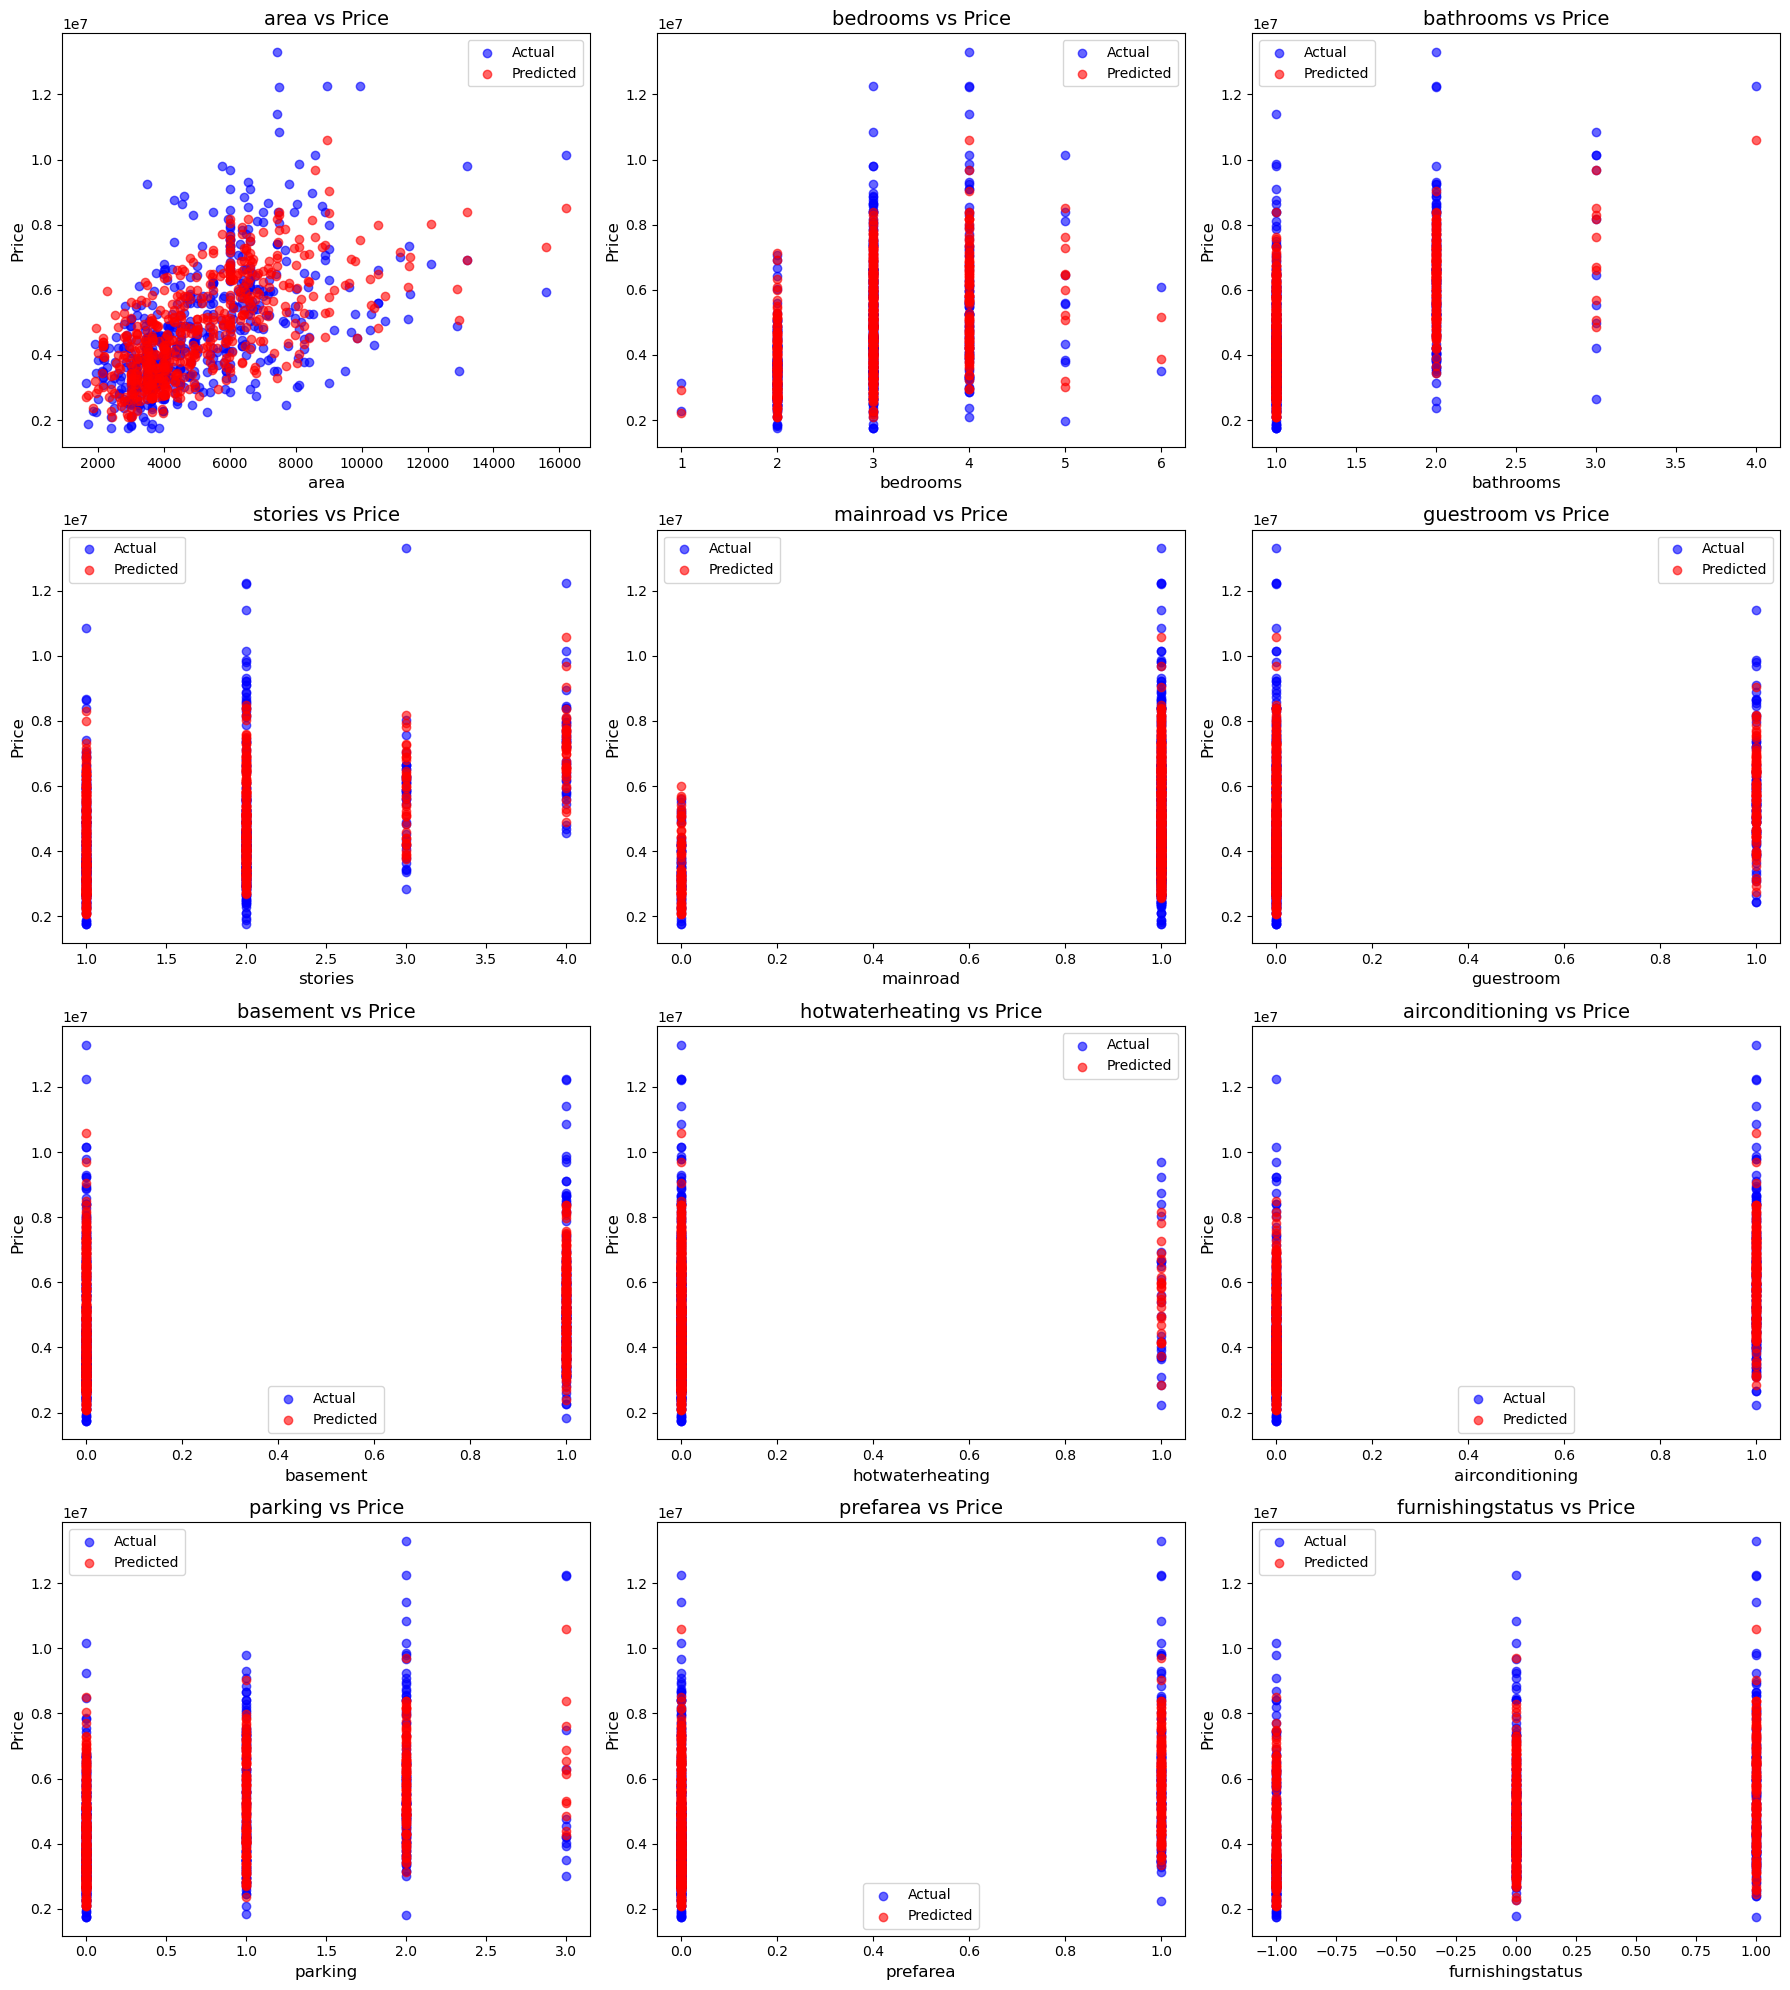

In [288]:


columns = X_train.columns
n_features = X_train.shape[1]

# Calculate rows and cols dynamically (max 3 cols)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(6 * n_cols, 5 * n_rows))

for i, col in enumerate(columns, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.scatter(X_train[col], y_targets, alpha=0.6, label="Actual", color="blue")
    plt.scatter(X_train[col], y_predicts, alpha=0.6, label="Predicted", color="red")
    
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Price", fontsize=12)
    plt.title(f"{col} vs Price", fontsize=14)
    plt.legend()

plt.tight_layout()
plt.show()


In [289]:
mae = mean_absolute_error(y_targets, y_predicts)
mse = mean_squared_error(y_targets, y_predicts)
rmse = np.sqrt(mse)
r2 = r2_score(y_targets, y_predicts)

print("Model Evaluation Results:")
print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"MSE  (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R²   (R-squared): {r2:.4f}")

Model Evaluation Results:
MAE  (Mean Absolute Error): 775064.48
MSE  (Mean Squared Error): 1117405847590.24
RMSE (Root Mean Squared Error): 1057074.19
R²   (R-squared): 0.6800
